Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install haversine
import haversine as hs

In [2]:
df = pd.read_csv(r"C:\Users\Melvin Wong\DataScience\Springboard\Github\Dataset\archive\fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Data definition

In [3]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [6]:
#unique number of CC with fraud
df.groupby('cc_num')['is_fraud'].nunique()

cc_num
60416207185            1
60422928733            1
60423098130            1
60427851591            1
60487002085            2
                      ..
4958589671582726883    2
4973530368125489546    1
4980323467523543940    1
4989847570577635369    2
4992346398065154184    1
Name: is_fraud, Length: 924, dtype: int64

Data Cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [9]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
#counts the null values for each column 
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
#moving the date next to the trans_date_trans_time
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'])
df['trans_date'] = df['trans_date'].dt.date
column_to_move = df['trans_date']
df.insert(1, 'date', column_to_move)
df

,trans_date_trans_time,date,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2020-06-21,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,2020-06-21,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,2020-06-21,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,2020-06-21,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,2020-06-21,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,2020-12-31,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,2020-12-31
555715,2020-12-31 23:59:09,2020-12-31,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,2020-12-31
555716,2020-12-31 23:59:15,2020-12-31,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,2020-12-31
555717,2020-12-31 23:59:24,2020-12-31,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,2020-12-31


In [12]:
#function to calculate distance
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

In [13]:
#calculating the dstiance from merchant location and customer location
distances = []
for index, row in df.iterrows():
    customer_lat = row['lat']
    customer_lon = row['long']
    merchant_lat = row['merch_lat']
    merchant_lon = row['merch_long']
    distance = haversine(customer_lat, customer_lon, merchant_lat, merchant_lon)
    distances.append(distance)
df['distance'] = distances

In [14]:
df

,trans_date_trans_time,date,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,distance
0,2020-06-21 12:14:25,2020-06-21,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21,24.561462
1,2020-06-21 12:14:33,2020-06-21,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21,104.925092
2,2020-06-21 12:14:53,2020-06-21,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21,59.080078
3,2020-06-21 12:15:15,2020-06-21,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21,27.698567
4,2020-06-21 12:15:17,2020-06-21,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21,104.335106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,2020-12-31,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,2020-12-31,77.026148
555715,2020-12-31 23:59:09,2020-12-31,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,2020-12-31,100.074420
555716,2020-12-31 23:59:15,2020-12-31,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,2020-12-31,80.759302
555717,2020-12-31 23:59:24,2020-12-31,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,2020-12-31,52.933240


In [15]:
#max years and min years
print(np.max(df['date']))
print(np.min(df['date']))

2020-12-31
2020-06-21


In [16]:
#count of average per category
df1 = df[['category','amt']]
df1.groupby(['category']).mean()

,amt
category,
entertainment,63.984840
food_dining,50.777938
gas_transport,63.577001
grocery_net,53.731667
grocery_pos,115.885327
health_fitness,53.867432
home,57.995413
kids_pets,57.506913
misc_net,78.600237


In [17]:
#count of fraud per category
df['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

Exploratory Data Analysis


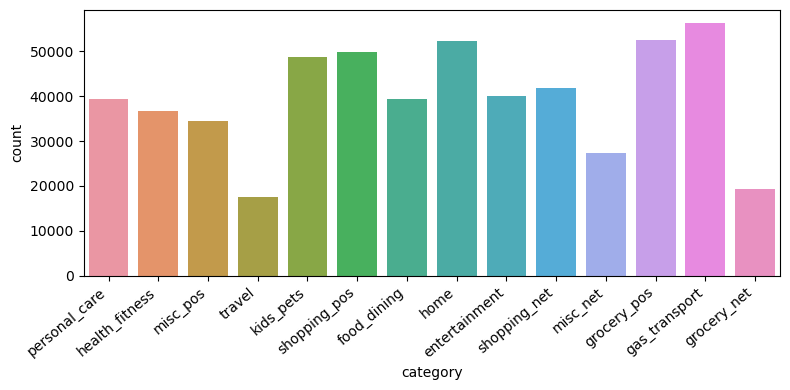

In [18]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df, x = 'category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

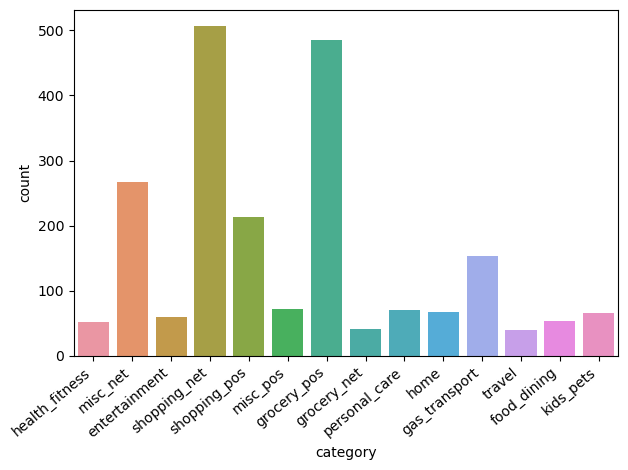

In [19]:
# % of fraud 
fraud_df = df[df['is_fraud']==1]
fraud_df.dtypes
fraud_df['category']
ax1 = sns.countplot(data = fraud_df, x= 'category')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [20]:
fraud_df

,trans_date_trans_time,date,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,distance
1685,2020-06-21 22:06:39,2020-06-21,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,F,Notrees,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,32.575873,-102.604290,1,2020-06-21,80.649140
1767,2020-06-21 22:32:22,2020-06-21,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,M,Benton,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10,42.461127,-91.147148,1,2020-06-21,66.097917
1781,2020-06-21 22:37:27,2020-06-21,6564459919350820,fraud_Nienow PLC,entertainment,620.33,M,Benton,53803,42.5545,-90.3508,1306,Public relations officer,1958-09-10,42.771834,-90.158365,1,2020-06-21,28.837509
1784,2020-06-21 22:38:55,2020-06-21,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,Denham Springs,70726,30.4590,-90.9027,71335,Herbalist,1994-05-31,31.204974,-90.261595,1,2020-06-21,103.089027
1857,2020-06-21 23:02:16,2020-06-21,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,F,Notrees,79759,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,31.315782,-102.736390,1,2020-06-21,60.504949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517197,2020-12-22 22:05:48,2020-12-22,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.573471,-89.911011,1,2020-12-22,6.945705
517274,2020-12-22 22:18:07,2020-12-22,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.091227,-90.390612,1,2020-12-22,75.956505
517341,2020-12-22 22:31:48,2020-12-22,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.628434,-90.284780,1,2020-12-22,36.534673
517529,2020-12-22 23:06:03,2020-12-22,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.746063,-90.401093,1,2020-12-22,48.808449


In [21]:
fraud_df['distance'].describe()

count    2145.000000
mean       76.213905
std        29.264066
min         3.839619
25%        55.293105
50%        78.593368
75%        98.422515
max       142.849901
Name: distance, dtype: float64

In [44]:
shopping_net_df = fraud_df[fraud_df['category'] == 'shopping_net']

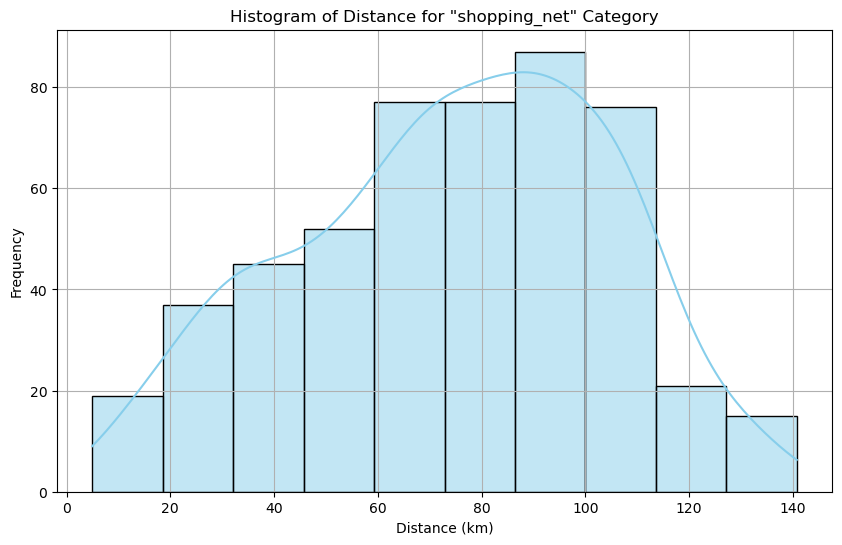

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(shopping_net_df['distance'], bins=10, kde=True, color='skyblue')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance for "shopping_net" Category')
plt.grid(True)
plt.show()

In [46]:
grocery_pos_df = fraud_df[fraud_df['category'] == 'grocery_pos']

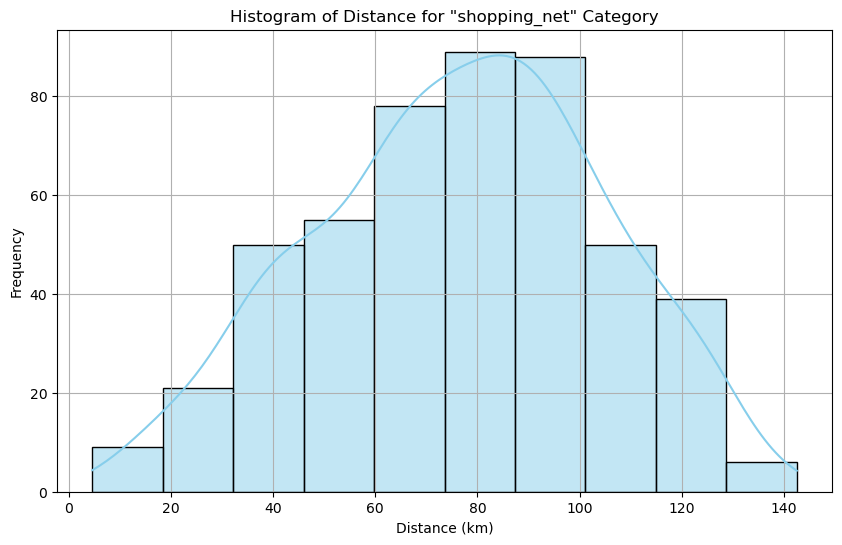

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(grocery_pos_df['distance'], bins=10, kde=True, color='skyblue')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance for "shopping_net" Category')
plt.grid(True)
plt.show()

In [48]:
misc_net_df = fraud_df[fraud_df['category'] == 'misc_net']

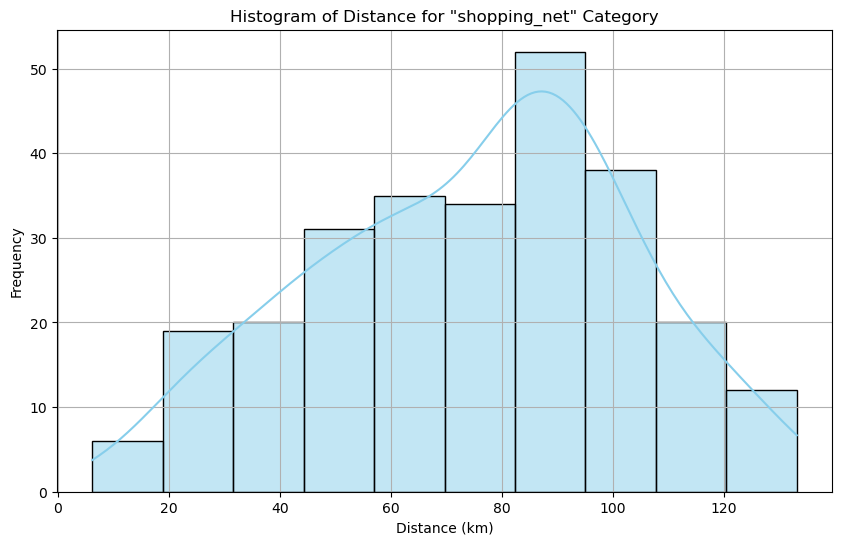

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(misc_net_df['distance'], bins=10, kde=True, color='skyblue')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Distance for "shopping_net" Category')
plt.grid(True)
plt.show()

In [53]:
from datetime import datetime

def day_of_week(date_str):
    # Assuming date_str is in the format 'YYYY-MM-DD'
    date_object = datetime.strptime(date_str, '%Y-%m-%d')
    day_index = date_object.weekday()
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    return days[day_index]

In [57]:
import pandas as pd

day_of_week_list = []
for index, row in fraud_df.iterrows():
    date_object = row['date']  # Assuming 'date' is the column containing datetime.date objects
    day_index = date_object.weekday()
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    day_of_week_list.append(days[day_index])

# Create a new DataFrame with the 'day_of_week' column
df = pd.DataFrame(day_of_week_list, columns=['day_of_week'])

# Concatenate the new DataFrame with the original fraud_df
df = pd.concat([fraud_df, df], axis=1)

In [58]:
df

,trans_date_trans_time,date,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,distance,day_of_week
1685,2020-06-21 22:06:39,2020-06-21,3.560725e+15,fraud_Hamill-D'Amore,health_fitness,24.84,F,Notrees,79759.0,31.8599,-102.7413,23.0,Cytogeneticist,1969-09-15,32.575873,-102.604290,1.0,2020-06-21,80.649140,Monday
1767,2020-06-21 22:32:22,2020-06-21,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,M,Benton,53803.0,42.5545,-90.3508,1306.0,Public relations officer,1958-09-10,42.461127,-91.147148,1.0,2020-06-21,66.097917,Friday
1781,2020-06-21 22:37:27,2020-06-21,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,M,Benton,53803.0,42.5545,-90.3508,1306.0,Public relations officer,1958-09-10,42.771834,-90.158365,1.0,2020-06-21,28.837509,Friday
1784,2020-06-21 22:38:55,2020-06-21,4.005677e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,Denham Springs,70726.0,30.4590,-90.9027,71335.0,Herbalist,1994-05-31,31.204974,-90.261595,1.0,2020-06-21,103.089027,Friday
1857,2020-06-21 23:02:16,2020-06-21,3.560725e+15,fraud_Hermann and Sons,shopping_pos,842.65,F,Notrees,79759.0,31.8599,-102.7413,23.0,Cytogeneticist,1969-09-15,31.315782,-102.736390,1.0,2020-06-21,60.504949,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
2141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
2142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
2143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday


In [61]:
cleaned_df = df.dropna()

In [63]:
cleaned_df

,trans_date_trans_time,date,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,distance,day_of_week
1685,2020-06-21 22:06:39,2020-06-21,3.560725e+15,fraud_Hamill-D'Amore,health_fitness,24.84,F,Notrees,79759.0,31.8599,-102.7413,23.0,Cytogeneticist,1969-09-15,32.575873,-102.604290,1.0,2020-06-21,80.649140,Monday
1767,2020-06-21 22:32:22,2020-06-21,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,M,Benton,53803.0,42.5545,-90.3508,1306.0,Public relations officer,1958-09-10,42.461127,-91.147148,1.0,2020-06-21,66.097917,Friday
1781,2020-06-21 22:37:27,2020-06-21,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,M,Benton,53803.0,42.5545,-90.3508,1306.0,Public relations officer,1958-09-10,42.771834,-90.158365,1.0,2020-06-21,28.837509,Friday
1784,2020-06-21 22:38:55,2020-06-21,4.005677e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,M,Denham Springs,70726.0,30.4590,-90.9027,71335.0,Herbalist,1994-05-31,31.204974,-90.261595,1.0,2020-06-21,103.089027,Friday
1857,2020-06-21 23:02:16,2020-06-21,3.560725e+15,fraud_Hermann and Sons,shopping_pos,842.65,F,Notrees,79759.0,31.8599,-102.7413,23.0,Cytogeneticist,1969-09-15,31.315782,-102.736390,1.0,2020-06-21,60.504949,Friday
1891,2020-06-21 23:16:12,2020-06-21,3.524575e+15,fraud_Thompson-Gleason,health_fitness,22.55,F,Vero Beach,32960.0,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,28.396402,-80.819469,1.0,2020-06-21,94.214012,Tuesday
1906,2020-06-21 23:21:44,2020-06-21,4.005677e+15,fraud_Kuhic LLC,shopping_net,1128.26,M,Denham Springs,70726.0,30.4590,-90.9027,71335.0,Herbalist,1994-05-31,30.354797,-91.146131,1.0,2020-06-21,26.062410,Wednesday
1956,2020-06-21 23:35:27,2020-06-21,4.005677e+15,"fraud_Reichert, Rowe and Mraz",shopping_net,931.82,M,Denham Springs,70726.0,30.4590,-90.9027,71335.0,Herbalist,1994-05-31,30.761363,-91.713600,1.0,2020-06-21,84.572981,Sunday
1968,2020-06-21 23:40:26,2020-06-21,4.005677e+15,"fraud_Kihn, Abernathy and Douglas",shopping_net,983.00,M,Denham Springs,70726.0,30.4590,-90.9027,71335.0,Herbalist,1994-05-31,29.902451,-91.749089,1.0,2020-06-21,102.218089,Monday
2026,2020-06-21 23:59:05,2020-06-21,6.564460e+15,fraud_Lemke-Gutmann,shopping_net,955.16,M,Benton,53803.0,42.5545,-90.3508,1306.0,Public relations officer,1958-09-10,43.027879,-90.493768,1.0,2020-06-21,53.914586,Friday


In [71]:
day_of_week_counts = df['day_of_week'].value_counts()

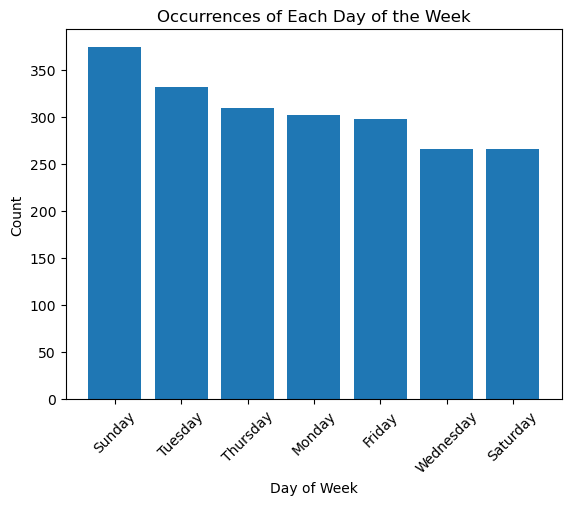

In [74]:
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Occurrences of Each Day of the Week')
plt.xticks(rotation=45)

plt.show()